In [37]:
"""
Innovation and wealth inequality data analysis

Joe Emmens

"""
"""
Fill in the path name as desired. For all the data analysis the corresponding data sets have
been uploaded to the GitHub repository under the same names used here. If all located in the
same working directory then the plots can be replicated.
"""

'\nInnovation and wealth inequality data analysis\n\nJoe Emmens\n'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [39]:
path_name = ""
os.chdir(f"{path_name}")

In [40]:
perspectives = pd.read_csv("Entrepreneurship Persepectives.csv")

environment = pd.read_csv("Entrepreneurship Environment.csv")

gini = pd.read_csv("Gini data.csv")

In [41]:
years = pd.date_range(start='1/1/2001', periods=18, freq='Y')

In [42]:
"""
Linearly interpolate misisng Gini years
"""

gini = gini.drop(columns="Country Code").set_index("Country Name")
gini = gini.replace("..", np.nan)
gini = gini.dropna(axis=0, how="all")

gini = gini.fillna(axis=1, method="ffill")
gini = gini.fillna(axis=1, method="bfill")

for col in gini.columns:
    gini.rename(columns={col : "Gini" + col[:4]}, inplace=True)

gini = gini.reset_index()

gini = pd.wide_to_long(gini, "Gini", i="Country Name", j="Year")

In [43]:
environment = environment.set_index(["economy", "year"])
environment = environment.drop(columns="code")
perspectives = perspectives.set_index(["economy", "year"])
perspectives = perspectives.drop(columns="code")

In [44]:
GEMData = environment.merge(perspectives,left_index=True, right_index=True)


In [45]:
GEMData.join(gini.rename_axis(GEMData.index.names))
Entreprenurship = pd.concat([GEMData, gini], axis=1, join="inner")

Entreprenurship = Entreprenurship.sort_index(sort_remaining="year")

GEMData = GEMData.sort_index(sort_remaining="year")

In [46]:
Entreprenurship["Gini"] = Entreprenurship["Gini"].astype(float)

low = np.quantile(Entreprenurship["Gini"], 0.33, axis=0)
high = np.quantile(Entreprenurship["Gini"], 0.66, axis=0)

Entreprenurship["Gini Rank"] = ""

In [47]:
"""
Divide the data according to their Gini coefficient to create three distinct groups
    1) Low inequality
    2) Medium inequality
    3) High inequality
"""

for row in Entreprenurship.index:

    Gini =  Entreprenurship.loc[row]["Gini"]

    if Gini < low:
       Entreprenurship.loc[row, "Gini Rank"] = 0

    elif Gini > high:
       Entreprenurship.loc[row, "Gini Rank"] = 2

    else:
        Entreprenurship.loc[row, "Gini Rank"] = 1


In [48]:
Entreprenurship = Entreprenurship.reset_index().set_index("level_0")

In [49]:
Entreprenurship = Entreprenurship.rename(columns={"level_1":"Year"})

Text(0.5, 0.98, 'Individual Entrepreneurship Statstics')

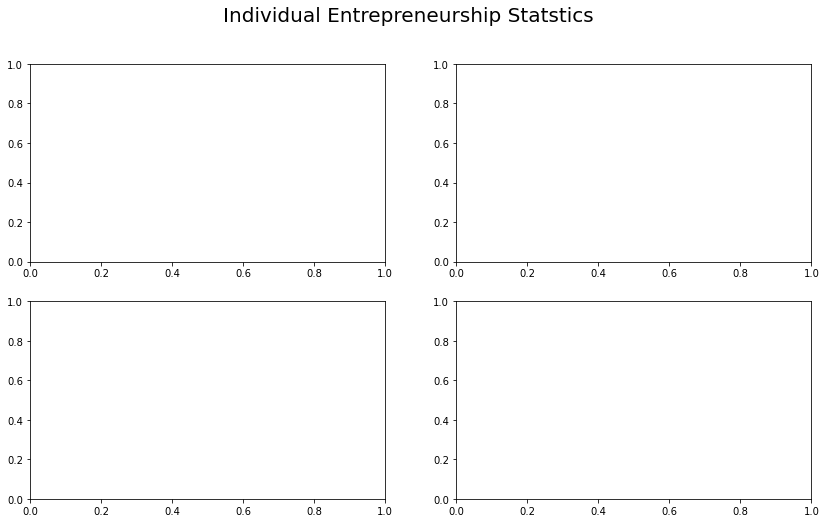

In [50]:
capabilities = Entreprenurship.groupby(["Gini Rank", "Year"])["Perceived capabilities"].mean()
innovation = Entreprenurship.groupby(["Gini Rank", "Year"])["Innovation"].mean()
failure = Entreprenurship.groupby(["Gini Rank", "Year"])["Fear of failure rate *"].mean()
TEA = Entreprenurship.groupby(["Gini Rank", "Year"])["Total early-stage Entrepreneurial Activity (TEA)"].mean()


infrastructure = Entreprenurship.groupby(["Gini Rank", "Year"])["Physical and services infrastructure"].mean()
openness = Entreprenurship.groupby(["Gini Rank", "Year"])["Internal market openness"].mean()
govt = Entreprenurship.groupby(["Gini Rank", "Year"])["Governmental support and policies"].mean()
social = Entreprenurship.groupby(["Gini Rank", "Year"])["Cultural and social norms"].mean()



rank = [0, 1, 2]
colours = ["firebrick", "darkslategrey", "darkgreen"]
labels = ["Low", "Medium", "High"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="w", figsize=(14, 8))
fig.suptitle("Individual Entrepreneurship Statstics", fontsize=20)

In [51]:
"""
Inidivdual Measures and Entrepreneurtship
"""
for r in rank:

    measure = capabilities[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax1.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_title("Percieved Capabilities", fontsize=14)
ax1.legend(loc=2)

for r in rank:

    measure = innovation[r]
    measure = measure.drop(labels=[ 2001, 2002, 2003, 2004, 2005 ,
                                                  2006, 2007 , 2008, 2009 , 2010], axis=0)

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax2.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax2.set_title("Innovation Created", fontsize=14)
ax2.legend(loc=2)

for r in rank:

    measure = failure[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax3.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])

    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax3.set_title("Fear of Failure", fontsize=14)
ax3.legend(loc=2)

for r in rank:

    measure = TEA[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax4.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax4.set_title("Early-stage Entrepreneurship", fontsize=14)
ax4.legend(loc=2)

#fig.savefig("Individual Measures")

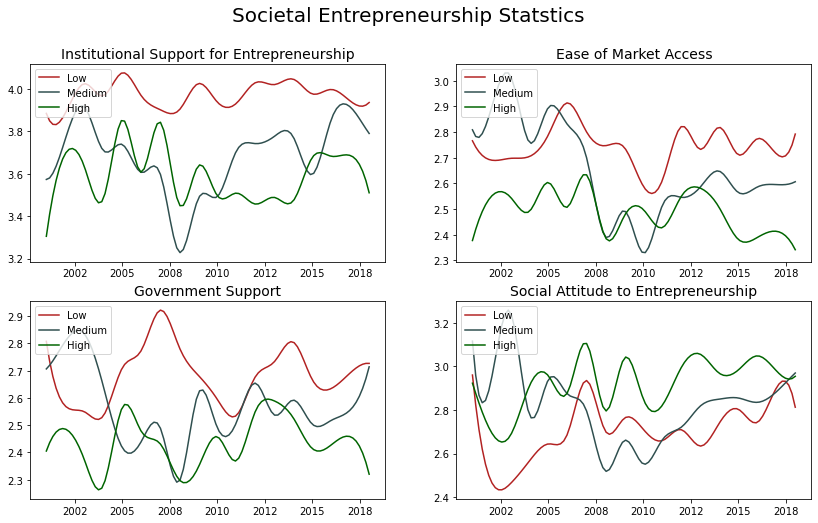

In [52]:
"""
Societal Measures on Entreprenership
"""
rank = [0, 1, 2]
colours = ["firebrick", "darkslategrey", "darkgreen"]
labels = ["Low", "Medium", "High"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="w", figsize=(14, 8))
fig.suptitle("Societal Entrepreneurship Statstics", fontsize=20)


for r in rank:

    measure = infrastructure[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax1.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_title("Institutional Support for Entrepreneurship", fontsize=14)
ax1.legend(loc=2)

for r in rank:

    measure = openness[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax2.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax2.set_title("Ease of Market Access", fontsize=14)
ax2.legend(loc=2)

for r in rank:

    measure = govt[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax3.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])

    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax3.set_title("Government Support", fontsize=14)
ax3.legend(loc=2)

for r in rank:

    measure = social[r]

    measure = dict(measure)

    date_np = np.array(list(measure.keys()))
    value_np = np.array(list(measure.values()))
    # smooth
    date_num_smooth = np.linspace(date_np.min(), date_np.max(), 100)
    spl = make_interp_spline(date_np, value_np, k=3)
    value_np_smooth = spl(date_num_smooth)
    # print
    #plt.plot(date_np, value_np)
    ax4.plot(date_num_smooth, value_np_smooth, c=colours[r], label=labels[r])
    #plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax4.set_title("Social Attitude to Entrepreneurship", fontsize=14)
ax4.legend(loc=2)

#fig.savefig("Societal Measures")

In [53]:
"""
Recreate the tables in Cagetti and De Nardi for 2019.

"""
SCF = pd.read_csv("QMSCFdata.csv")
SCF = SCF.drop(columns="x3014")
SCF = SCF.groupby("yy1").mean()
SCF["Total Wealth"] = SCF.iloc[:, 3:].sum(axis=1)
SCF["x4106"].unique()

array([1., 0., 2.])

In [54]:
print("The number of self employed is", len(SCF[SCF["x4106"] == 2]))
print("The number of business owners is", len(SCF[SCF["x3103"] == 1]))
print("The number of active managers is", len(SCF[SCF["x3104"] == 1]))

The number of self employed is 1259
The number of business owners is 1583
The number of active managers is 1417


In [55]:
"""
Self employed + Business owners
"""
row_1 = SCF.groupby(["x3103" , "x4106"]).agg({"Total Wealth": 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
row_1

Total Wealth
x3103 x4106              
1.0   0.0       18.746934
      1.0       13.287091
      2.0       52.778138
5.0   0.0        7.681684
      1.0        5.936954
      2.0        1.569199

In [56]:
row_1_pop = SCF.groupby(["x3103" , "x4106"])["x3902"].count()
row_1_pop = (row_1_pop / row_1_pop.sum())* 100
row_1_pop

x3103  x4106
1.0    0.0       3.081184
       1.0       6.162368
       2.0      18.158214
5.0    0.0      24.009001
       1.0      44.954128
       2.0       3.635105
Name: x3902, dtype: float64

In [57]:
"""
Business owners only
"""
row_2 = SCF.groupby(["x3103"]).agg({"Total Wealth": 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
row_2

,Total Wealth
x3103,
1.0,84.812163
5.0,15.187837


In [58]:
row_2_pop = SCF.groupby(["x3103"])["x3103"].count()
row_2_pop = (row_2_pop / row_2_pop.sum())* 100
row_2_pop

x3103
1.0    27.401766
5.0    72.598234
Name: x3103, dtype: float64

In [59]:
"""
Active Managers only
"""
row_3 = SCF.groupby(["x3104"]).agg({"Total Wealth": 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
row_3

,Total Wealth
x3104,
0.0,15.187837
1.0,61.981719
2.6,0.001322
5.0,22.829122


In [60]:
row_3_pop = SCF.groupby(["x3104"])["x3104"].count()
row_3_pop = (row_3_pop / row_3_pop.sum())* 100
row_3_pop

x3104
0.0    72.598234
1.0    24.528302
2.6     0.017310
5.0     2.856154
Name: x3104, dtype: float64

In [61]:
"""
Self employed only
"""
row_4 = SCF.groupby(["x4106"]).agg({"Total Wealth": 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
row_4

,Total Wealth
x4106,
0.0,26.428618
1.0,19.224045
2.0,54.347337


In [62]:
row_4_pop = SCF.groupby(["x4106"])["x4106"].count()
row_4_pop = (row_4_pop / row_4_pop.sum())* 100
row_4_pop

x4106
0.0    27.090185
1.0    51.116496
2.0    21.793318
Name: x4106, dtype: float64

In [63]:
"""
Self employed + business owners + active managers
"""
row_5 = SCF.groupby(["x3103" , "x4106", "x3104"]).agg({"Total Wealth": 'sum'}).apply(lambda x: 100 * x / float(x.sum()))
row_5

Total Wealth
x3103 x4106 x3104              
1.0   0.0   1.0        5.159334
            5.0       13.587600
      1.0   1.0        5.617376
            2.6        0.001322
            5.0        7.668393
      2.0   1.0       51.205009
            5.0        1.573129
5.0   0.0   0.0        7.681684
      1.0   0.0        5.936954
      2.0   0.0        1.569199

In [64]:
row_5_pop = SCF.groupby(["x3103" , "x4106", "x3104"])["x3902"].count()
row_5_pop = (row_5_pop / row_5_pop.sum())* 100
row_5_pop

x3103  x4106  x3104
1.0    0.0    1.0       1.852172
              5.0       1.229012
       1.0    1.0       4.898736
              2.6       0.017310
              5.0       1.246322
       2.0    1.0      17.777393
              5.0       0.380820
5.0    0.0    0.0      24.009001
       1.0    0.0      44.954128
       2.0    0.0       3.635105
Name: x3902, dtype: float64

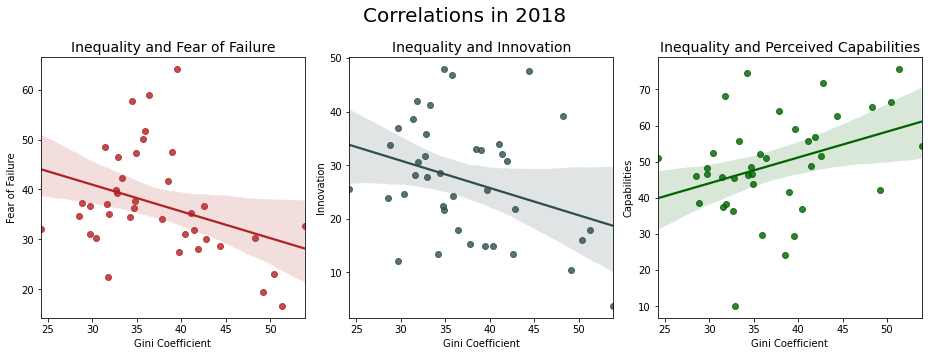

In [65]:
"""
Correlations plots
"""

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3 , facecolor="w", figsize=(13, 5))
fig.suptitle("Correlations in 2018", fontsize=20)

x = Entreprenurship[Entreprenurship["Year"] == 2018]["Gini"]
y = Entreprenurship[Entreprenurship["Year"] == 2018]["Fear of failure rate *"]

sns.regplot(x=x, y=y, fit_reg=True, color="firebrick", ax=ax1)
ax1.set_title("Inequality and Fear of Failure", fontsize=14)
ax1.set_xlabel("Gini Coefficient")
ax1.set_ylabel("Fear of Failure")

x = Entreprenurship[Entreprenurship["Year"] == 2018]["Gini"]
y = Entreprenurship[Entreprenurship["Year"] == 2018]["Innovation"]

sns.regplot(x=x, y=y, fit_reg=True, color="darkslategrey", ax=ax2)
ax2.set_title("Inequality and Innovation", fontsize=14)
ax2.set_xlabel("Gini Coefficient")
ax2.set_ylabel("Innovation")

x = Entreprenurship[Entreprenurship["Year"] == 2018]["Gini"]
y = Entreprenurship[Entreprenurship["Year"] == 2018]["Perceived capabilities"]

sns.regplot(x=x, y=y, fit_reg=True, color="darkgreen", ax=ax3)
ax3.set_title("Inequality and Perceived Capabilities", fontsize=14)
ax3.set_xlabel("Gini Coefficient")
ax3.set_ylabel("Capabilities")

plt.tight_layout()

#fig.savefig("Correlations.png")

In [66]:
top1per = pd.read_excel("Top1percent.xlsx", sheet_name="Sheet1")

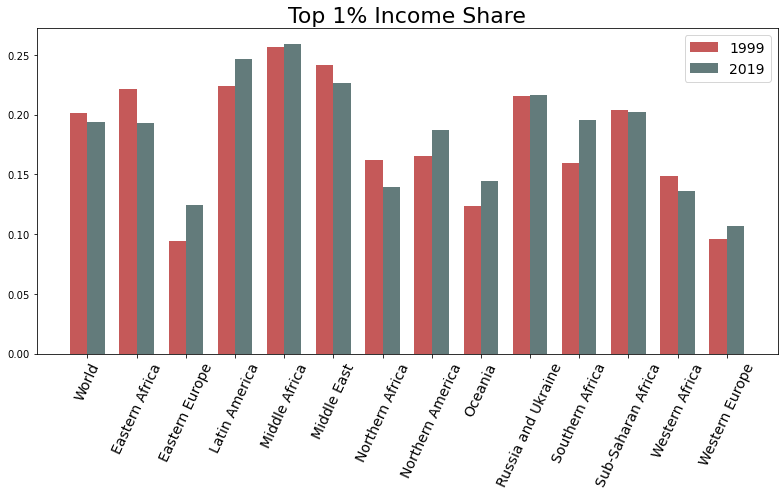

In [67]:
length = len(top1per)
x = np.arange(length)
x_labels=top1per["Area"]

width=0.35


fig, ax = plt.subplots(facecolor="w", figsize=(11,7))

rects2 = ax.bar(x - width/2, top1per["Value99"], width, label='1999', color="firebrick", alpha=0.75)
rects1 = ax.bar(x + width/2, top1per["Value19"], width, label='2019', color="darkslategrey", alpha=0.75)


ax.set_title("Top 1% Income Share", fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(fontsize=14)
plt.xticks(rotation=65, fontsize=14)

plt.tight_layout()
fig.savefig("Top1%")

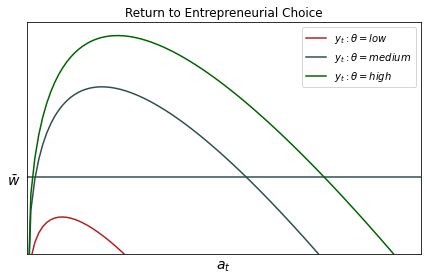

In [68]:
gamma = 10

theta1 = 0.25
theta2 = 0.4
theta3 = 0.45

r = 0.02
alpha = 0.38
x = np.linspace(0, 10, 100)

foo1 = np.ones(len(x))
foo2 = lambda x: gamma*theta1*x**(alpha) - 1 - (1+r)*x
foo3 = lambda x: gamma*theta2*x**(alpha) - 1 - (1+r)*x
foo4 = lambda x: gamma*theta3*x**(alpha) - 1 - (1+r)*x

fig, ax = plt.subplots(facecolor="w")
plt.plot(x, foo1, color="darkslategrey")
plt.plot(x, foo2(x), color="firebrick", label=r"$y_t : \theta = low$")
plt.plot(x, foo3(x), color="darkslategrey", label=r"$y_t : \theta = medium$")
plt.plot(x, foo4(x), color="darkgreen", label=r"$y_t : \theta = high$")
plt.xlim((0, 10))
plt.ylim((0, 3))
plt.yticks(())
plt.xticks(())
plt.legend()
plt.title("Return to Entrepreneurial Choice")
plt.xlabel("$a_t$", fontsize=14)
plt.text(-0.5, 0.9, r"$\bar{w}$", fontsize=14)
plt.tight_layout()
fig.savefig("Theory")
